Importing the Student 2021 & 2022 data understanding the data

In [3]:
import pandas as pd
stud_2021=pd.read_csv("/content/student_responses_2021.csv")
stud_2022=pd.read_csv("/content/student_responses_2022.csv")

In [4]:
stud_2021.head()

,student_id,question_id,ability,difficulty,answered_correctly
0,967,40,-0.320326,1.572793,False
1,135,2,-2.897524,-1.920777,False
2,553,18,-1.207800,-0.482901,False
3,564,29,-2.012802,0.360224,False
4,449,42,0.332158,1.211066,False


In [5]:
stud_2021.shape

(45000, 5)

In [6]:
stud_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          45000 non-null  int64  
 1   question_id         45000 non-null  int64  
 2   ability             44100 non-null  float64
 3   difficulty          44100 non-null  float64
 4   answered_correctly  45000 non-null  bool   
dtypes: bool(1), float64(2), int64(2)
memory usage: 1.4 MB


In [7]:
stud_2021.describe()

,student_id,question_id,ability,difficulty
count,45000.000000,45000.000000,44100.000000,44100.000000
mean,500.500000,23.000000,-0.041824,-0.057131
std,288.678198,12.987317,2.167235,1.053968
min,1.000000,1.000000,-5.751698,-2.157522
25%,250.750000,12.000000,-1.507034,-0.870725
50%,500.500000,23.000000,-0.068255,-0.147794
75%,750.250000,34.000000,1.442855,0.904278
max,1000.000000,45.000000,5.889554,1.774446


In [8]:
stud_2021.isnull().sum()

,0
student_id,0
question_id,0
ability,900
difficulty,900
answered_correctly,0


2022 - Data undersstadning

In [9]:
stud_2022.head()

,student_id,question_id,ability,difficulty,answered_correctly
0,1078,22,1.023237,-0.280792,True
1,1980,37,-2.243018,1.430540,False
2,1240,14,3.453396,-0.872714,True
3,1329,33,1.750230,0.816172,True
4,1995,17,2.288340,-0.558914,True


In [10]:
stud_2022.shape

(50000, 5)

In [11]:
stud_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          50000 non-null  int64  
 1   question_id         50000 non-null  int64  
 2   ability             49000 non-null  float64
 3   difficulty          49000 non-null  float64
 4   answered_correctly  50000 non-null  bool   
dtypes: bool(1), float64(2), int64(2)
memory usage: 1.6 MB


In [12]:
stud_2022.describe()

,student_id,question_id,ability,difficulty
count,50000.000000,50000.000000,49000.000000,49000.000000
mean,1500.500000,25.500000,0.330433,0.116709
std,288.677877,14.431014,2.448007,1.171172
min,1001.000000,1.000000,-5.653869,-1.955096
25%,1250.750000,13.000000,-1.047968,-0.728539
50%,1500.500000,25.500000,0.101803,-0.007172
75%,1750.250000,38.000000,1.704314,1.199790
max,2000.000000,50.000000,9.957734,2.194765


In [13]:
stud_2022.isnull().sum()

,0
student_id,0
question_id,0
ability,1000
difficulty,1000
answered_correctly,0


In [14]:
stud_2021.nunique()

,0
student_id,1000
question_id,45
ability,1000
difficulty,45
answered_correctly,2


In [15]:
stud_2022.nunique()

,0
student_id,1000
question_id,50
ability,1000
difficulty,50
answered_correctly,2


Adding year columns to combine data both data set in to one data frame

In [16]:
stud_2021["year"]=2021

In [17]:
stud_2021.head()

,student_id,question_id,ability,difficulty,answered_correctly,year
0,967,40,-0.320326,1.572793,False,2021
1,135,2,-2.897524,-1.920777,False,2021
2,553,18,-1.207800,-0.482901,False,2021
3,564,29,-2.012802,0.360224,False,2021
4,449,42,0.332158,1.211066,False,2021


In [18]:
stud_2022["year"]=2022

In [19]:
stud_2022.head()

,student_id,question_id,ability,difficulty,answered_correctly,year
0,1078,22,1.023237,-0.280792,True,2022
1,1980,37,-2.243018,1.430540,False,2022
2,1240,14,3.453396,-0.872714,True,2022
3,1329,33,1.750230,0.816172,True,2022
4,1995,17,2.288340,-0.558914,True,2022


Combine 2021 & 2022 data set into one data frame for analysing better

In [20]:
tot_stud = pd.concat([stud_2021, stud_2022], ignore_index=True)
tot_stud.shape

(95000, 6)

its a nearly balanced data set because out of all the record in the data set target value equally provided to predict the same

In [21]:
# Group by 'Answered Correctly' and count the number of occurrences
grouped_data = tot_stud.groupby('answered_correctly')['answered_correctly'].count()
grouped_data

,answered_correctly
answered_correctly,
False,46312
True,48688


As per the data set provided 2021 data set having 900 missing data and 2022 data set havning 1000 missing values in the column difficulty & ability

In [22]:
tot_stud.isnull().sum()

,0
student_id,0
question_id,0
ability,1900
difficulty,1900
answered_correctly,0
year,0


In [23]:
# Display rows with any missing values in the tot_stud DataFrame
null_records = tot_stud[tot_stud.isnull().any(axis=1)]

# Show the result
print(null_records)

       student_id  question_id   ability  difficulty  answered_correctly  year
86            835           42 -0.571899         NaN               False  2021
94            741           21       NaN   -0.374363                True  2021
182           584           38       NaN    1.404042               False  2021
241           990           41       NaN    1.469058               False  2021
247           911           20 -2.694178         NaN               False  2021
...           ...          ...       ...         ...                 ...   ...
94851        1455           16       NaN   -0.668103               False  2022
94868        1979           26       NaN    0.099911                True  2022
94976        1295           45       NaN    1.290243               False  2022
94979        1178            6 -2.755662         NaN               False  2022
94998        1632            4       NaN   -1.316538                True  2022

[3752 rows x 6 columns]


Adding values with difficulty column based on previous question difficulty range year wise & question id wise

In [24]:
# Step 1: Create a mapping of (question_id, year) to difficulty where difficulty is not null
difficulty_mapping = tot_stud.dropna(subset=['difficulty']).set_index(['question_id', 'year'])['difficulty'].to_dict()

# Step 2: Define a function to fill missing 'difficulty' values using the mapping
def fill_difficulty(row):
    if pd.isnull(row['difficulty']):  # If difficulty is NaN
        return difficulty_mapping.get((row['question_id'], row['year']), row['difficulty'])
    else:
        return row['difficulty']

# Step 3: Apply the function row-wise to the 'difficulty' column
tot_stud['difficulty'] = tot_stud.apply(fill_difficulty, axis=1)

# Display the result
print(tot_stud)

       student_id  question_id   ability  difficulty  answered_correctly  year
0             967           40 -0.320326    1.572793               False  2021
1             135            2 -2.897524   -1.920777               False  2021
2             553           18 -1.207800   -0.482901               False  2021
3             564           29 -2.012802    0.360224               False  2021
4             449           42  0.332158    1.211066               False  2021
...           ...          ...       ...         ...                 ...   ...
94995        1402           13  0.460793   -1.077263                True  2022
94996        1954           19  4.303861   -0.319677                True  2022
94997        1763           39 -0.644500    0.947210               False  2022
94998        1632            4       NaN   -1.316538                True  2022
94999        1844           33  1.512457    0.816172                True  2022

[95000 rows x 6 columns]


In [25]:
tot_stud.isnull().sum()

,0
student_id,0
question_id,0
ability,1900
difficulty,0
answered_correctly,0
year,0


In [26]:
# Step 1: Calculate mean ability per (student_id, difficulty, answered_correctly, year) combination
mean_ability = tot_stud.groupby(['student_id', 'difficulty', 'answered_correctly', 'year'])['ability'].mean().reset_index()

# Rename the ability column to avoid confusion after merging
mean_ability.rename(columns={'ability': 'ability_mean'}, inplace=True)

# Step 2: Merge the calculated means back to the original DataFrame
tot_stud = tot_stud.merge(mean_ability, on=['student_id', 'difficulty', 'answered_correctly', 'year'], how='left')

# Step 3: Use the 'ability_mean' column to fill missing values in 'ability' (without inplace)
tot_stud['ability'] = tot_stud['ability'].fillna(tot_stud['ability_mean'])

# Step 4: Drop the helper 'ability_mean' column as it is no longer needed
tot_stud = tot_stud.drop(columns=['ability_mean'])

# Step 5: (Optional) Fill any remaining NaNs in 'ability' with the overall mean if needed
tot_stud['ability'] = tot_stud['ability'].fillna(tot_stud['ability'].mean())

# Display the result
print(tot_stud)

# Optional: Check if any 'ability' values are still NaN and print the rows where this occurs
remaining_nans = tot_stud[tot_stud['ability'].isnull()]
if not remaining_nans.empty:
    print("Rows with remaining NaN values in 'ability':")
    print(remaining_nans)


       student_id  question_id   ability  difficulty  answered_correctly  year
0             967           40 -0.320326    1.572793               False  2021
1             135            2 -2.897524   -1.920777               False  2021
2             553           18 -1.207800   -0.482901               False  2021
3             564           29 -2.012802    0.360224               False  2021
4             449           42  0.332158    1.211066               False  2021
...           ...          ...       ...         ...                 ...   ...
94995        1402           13  0.460793   -1.077263                True  2022
94996        1954           19  4.303861   -0.319677                True  2022
94997        1763           39 -0.644500    0.947210               False  2022
94998        1632            4  0.154100   -1.316538                True  2022
94999        1844           33  1.512457    0.816172                True  2022

[95000 rows x 6 columns]


In [27]:
tot_stud.isnull().sum()

,0
student_id,0
question_id,0
ability,0
difficulty,0
answered_correctly,0
year,0


In [28]:
tot_stud.nunique()

,0
student_id,2000
question_id,50
ability,2001
difficulty,95
answered_correctly,2
year,2


In [29]:
tot_stud.to_csv("tot_stud.csv", index=False)
tot_stud.head()

,student_id,question_id,ability,difficulty,answered_correctly,year
0,967,40,-0.320326,1.572793,False,2021
1,135,2,-2.897524,-1.920777,False,2021
2,553,18,-1.207800,-0.482901,False,2021
3,564,29,-2.012802,0.360224,False,2021
4,449,42,0.332158,1.211066,False,2021


Basic Descriptive Statistics:
         student_id   question_id       ability    difficulty          year
count  95000.000000  95000.000000  95000.000000  95000.000000  95000.000000
mean    1026.815789     24.315789      0.154100      0.034742   2021.526316
std      576.753180     13.822452      2.303290      1.120782      0.499310
min        1.000000      1.000000     -5.751698     -2.157522   2021.000000
25%      528.000000     12.000000     -1.226753     -0.870725   2021.000000
50%     1050.500000     24.000000      0.081641     -0.147794   2022.000000
75%     1525.250000     36.000000      1.519149      1.069916   2022.000000
max     2000.000000     50.000000      9.957734      2.194765   2022.000000

Average Ability by Year:
year
2021   -0.037906
2022    0.326906
Name: ability, dtype: float64

Correct Answer Rate Statistics:
count     95000
unique        2
top        True
freq      48688
Name: answered_correctly, dtype: object

Pearson Correlation Test between Difficulty and Corre

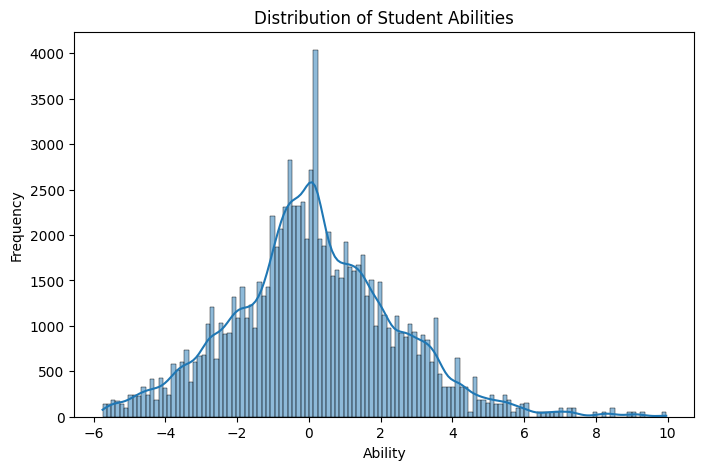

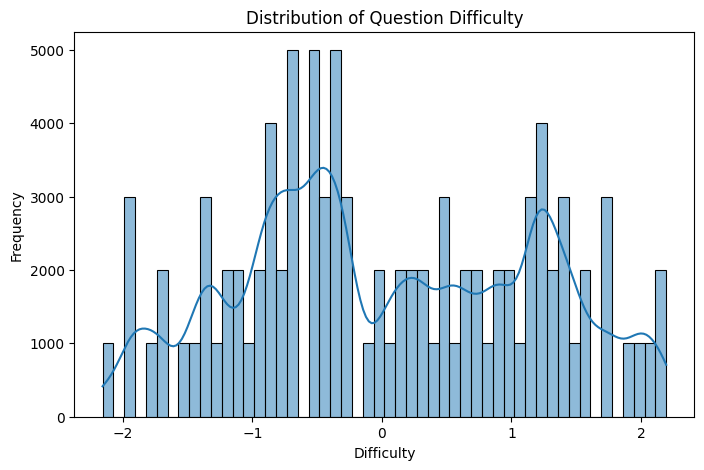

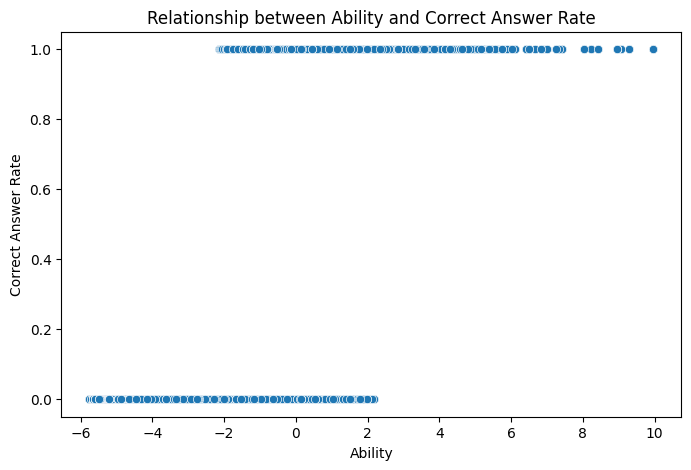


Average Difficulty by Year:
year
2021   -0.056167
2022    0.116560
Name: difficulty, dtype: float64

Average Correct Answer Rate by Year:
year
2021    0.502467
2022    0.521540
Name: answered_correctly, dtype: float64


In [35]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Initial Analysis and Descriptive Statistics
print("Basic Descriptive Statistics:")
print(tot_stud.describe())

# 2. Grouped Analysis: Average Ability by Year
ability_by_year = tot_stud.groupby('year')['ability'].mean()
print("\nAverage Ability by Year:")
print(ability_by_year)

# 3. Analysis of Correct Answer Rates
correct_rate_stats = tot_stud['answered_correctly'].describe()
print("\nCorrect Answer Rate Statistics:")
print(correct_rate_stats)

# 4. Statistical Testing
# Hypothesis: There is a relationship between question difficulty and ability to answer correctly

# Using Pearson correlation test between 'difficulty' and 'answered_correctly'
correlation, p_value = stats.pearsonr(tot_stud['difficulty'], tot_stud['answered_correctly'])
print("\nPearson Correlation Test between Difficulty and Correct Answers:")
print(f"Correlation: {correlation}, p-value: {p_value}")

# 5. Visual Analysis
# Distribution of Ability
plt.figure(figsize=(8, 5))
sns.histplot(tot_stud['ability'], kde=True)
plt.title('Distribution of Student Abilities')
plt.xlabel('Ability')
plt.ylabel('Frequency')
plt.show()

# Distribution of Difficulty
plt.figure(figsize=(8, 5))
sns.histplot(tot_stud['difficulty'], kde=True)
plt.title('Distribution of Question Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.show()

# Relationship between Ability and Correct Answer Rate
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ability', y='answered_correctly', data=tot_stud)
plt.title('Relationship between Ability and Correct Answer Rate')
plt.xlabel('Ability')
plt.ylabel('Correct Answer Rate')
plt.show()

# 6. Additional Descriptive Insights
# Mean Difficulty and Correct Answer Rate by Year
difficulty_by_year = tot_stud.groupby('year')['difficulty'].mean()
correct_rate_by_year = tot_stud.groupby('year')['answered_correctly'].mean()

print("\nAverage Difficulty by Year:")
print(difficulty_by_year)
print("\nAverage Correct Answer Rate by Year:")
print(correct_rate_by_year)

1) How did the student's ability to answer the questions change ? (Difficulty and Correct Answers):

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the data
# Group by student_id and year, calculating the mean ability for each year
ability_trend = tot_stud.groupby(['student_id', 'year'])['ability'].mean().reset_index()

# Plotting the change in ability over time for each student
plt.figure(figsize=(12, 6))

# Loop through each student and plot their ability trend over the years
for student_id in ability_trend['student_id'].unique():
    student_data = ability_trend[ability_trend['student_id'] == student_id]
    plt.plot(student_data['year'], student_data['ability'], marker='o', label=f'Student {student_id}')

plt.title("Change in Students' Ability Over Time")
plt.xlabel("Year")
plt.ylabel("Ability")
plt.legend(title='Student ID')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

2) Did the questions get difficult or easy?

Analyze the Difficulty Trend Over Time

In [ ]:
# Grouping by 'year' and calculating the average difficulty
difficulty_trend = tot_stud.groupby('year')['difficulty'].mean().reset_index()

# Display the trend of difficulty over years
print(difficulty_trend)

   year  difficulty
0  2021   -0.056167
1  2022    0.116560


Assess the Relationship Between Difficulty and Performance (Correct Answers)

In [ ]:
# Grouping by year and calculating average 'answered_correctly' (student performance)
performance_trend = tot_stud.groupby('year')['answered_correctly'].mean().reset_index()

# Merging the difficulty and performance trends
difficulty_performance_trend = pd.merge(difficulty_trend, performance_trend, on='year')

# Display the combined trend
print(difficulty_performance_trend)

   year  difficulty  answered_correctly
0  2021   -0.056167            0.502467
1  2022    0.116560            0.521540


Visualizing the Trends (Plotting)

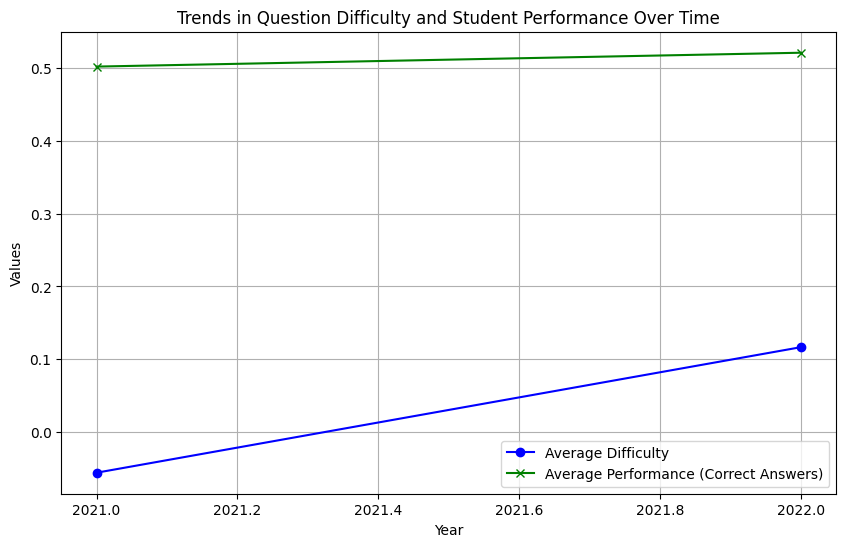

In [ ]:
import matplotlib.pyplot as plt

# Plotting the difficulty and performance trends over the years
plt.figure(figsize=(10, 6))

# Plotting difficulty trend
plt.plot(difficulty_trend['year'], difficulty_trend['difficulty'], label='Average Difficulty', color='blue', marker='o')

# Plotting performance trend
plt.plot(performance_trend['year'], performance_trend['answered_correctly'], label='Average Performance (Correct Answers)', color='green', marker='x')

# Adding titles and labels
plt.title('Trends in Question Difficulty and Student Performance Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

4) Note down any other observations you may have about the data.

Feature Engineering

In [ ]:
# --- 1. Student-Level Features ---
# Calculate student-level features
student_stats = tot_stud.groupby('student_id').agg(
    avg_ability=('ability', 'mean'),
    correct_answer_rate=('answered_correctly', 'mean'),
    total_questions_answered=('answered_correctly', 'count')
).reset_index()

# Merge student-level features back to the original dataset
tot_stud = tot_stud.merge(student_stats, on='student_id', how='left')

# --- 2. Question-Level Features ---
# Calculate question-level features
question_stats = tot_stud.groupby('question_id').agg(
    avg_difficulty=('difficulty', 'mean'),
    question_correct_answer_rate=('answered_correctly', 'mean')
).reset_index()

# Merge question-level features back to the original dataset
tot_stud = tot_stud.merge(question_stats, on='question_id', how='left')

# --- 3. Display the first few rows of the updated DataFrame ---
print(tot_stud.head())

   student_id  question_id   ability  difficulty  answered_correctly  year  \
0         967           40 -0.320326    1.572793               False  2021   
1         135            2 -2.897524   -1.920777               False  2021   
2         553           18 -1.207800   -0.482901               False  2021   
3         564           29 -2.012802    0.360224               False  2021   
4         449           42  0.332158    1.211066               False  2021   

   avg_ability  correct_answer_rate  total_questions_answered  avg_difficulty  \
0    -0.309783             0.422222                        45        1.665398   
1    -2.897524             0.000000                        45       -1.703236   
2    -1.207800             0.177778                        45       -0.520942   
3    -2.012802             0.022222                        45        0.429229   
4     0.332158             0.622222                        45        1.280454   

   question_correct_answer_rate  
0         

3) Can you create a model that can predict if a student will answer a question correctly?

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = tot_stud[['student_id', 'question_id', 'ability', 'difficulty', 'year','avg_ability','correct_answer_rate','total_questions_answered','avg_difficulty','question_correct_answer_rate']]  # features
y = tot_stud['answered_correctly']  # target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9995263157894737
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9221
        True       1.00      1.00      1.00      9779

    accuracy                           1.00     19000
   macro avg       1.00      1.00      1.00     19000
weighted avg       1.00      1.00      1.00     19000



Feature Importance

In [ ]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                        Feature  Importance
6           correct_answer_rate    0.299227
5                   avg_ability    0.245789
2                       ability    0.194954
3                    difficulty    0.094913
9  question_correct_answer_rate    0.070179
8                avg_difficulty    0.055316
1                   question_id    0.035679
0                    student_id    0.002055
4                          year    0.001006
7      total_questions_answered    0.000883


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")

# Predict and evaluate the tuned model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)
print(f"Accuracy of Tuned Model: {accuracy_score(y_test, y_pred_tuned)}")

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of Tuned Model: 0.9994736842105263


In [ ]:
!pip install gradio

In [ ]:
# prompt: create gradio app for the above feature and prediction for the classiffication model. color use green,orange,black

import gradio as gr
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming your trained model is called 'rf_model' and your feature columns are in 'X'
# You can replace these with your actual model and feature columns.

def predict_answer(student_id, question_id, ability, difficulty, year, avg_ability, correct_answer_rate, total_questions_answered, avg_difficulty, question_correct_answer_rate):
  input_data = pd.DataFrame({
      'student_id': [student_id],
      'question_id': [question_id],
      'ability': [ability],
      'difficulty': [difficulty],
      'year': [year],
      'avg_ability': [avg_ability],
      'correct_answer_rate': [correct_answer_rate],
      'total_questions_answered': [total_questions_answered],
      'avg_difficulty': [avg_difficulty],
      'question_correct_answer_rate': [question_correct_answer_rate]
  })

  prediction = rf_model.predict(input_data)[0]

  if prediction == 1:
    return "Correct"
  else:
    return "Incorrect"


iface = gr.Interface(
    fn=predict_answer,
    inputs=[
        gr.Number(label="Student ID"),
        gr.Number(label="Question ID"),
        gr.Number(label="Ability"),
        gr.Number(label="Difficulty"),
        gr.Number(label="Year"),
        gr.Number(label="Average Ability"),
        gr.Number(label="Correct Answer Rate"),
        gr.Number(label="Total Questions Answered"),
        gr.Number(label="Average Difficulty"),
        gr.Number(label="Question Correct Answer Rate")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Student Question Prediction",
    description="Predict whether a student will answer a question correctly.",
    theme="dark-grass",  # Use a green theme, you can experiment with other themes
    # Example:
    # examples=[
    #     [1, 1, 0.75, 0.5, 2021, 0.7, 0.8, 10, 0.5, 0.7],
    # ]
)

iface.launch()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:1020: UserWarning: Cannot load dark-grass. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/dark-grass (Request ID: Root=1-672e0421-3e4f233d090819f87bb93bb5;17f48527-581f-47d6-a80f-bdab4f034f33)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://adbbdd98d5d6276b7a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
